In [ ]:
import pandas as pd


df = pd.read_csv('/content/drive/MyDrive/covid/COVID_FILE.csv')

df = df.drop(['source', 'province','longitude','latitude','days_onset_to_admission','symptoms','geo_resolution','city','country','date_admission_hospital','date_death_or_discharge'], axis=1)
df.head(9)

,ID,age,sex,cough,fever,chills,sore_throat,headache,fatigue,urgency_of_admission,date_onset_symptoms,date_confirmation
0,de-a8f7-4e4f-bb99-3a782c102082,58.0,female,No,No,No,No,No,No,Low,25-02-20,27-02-20
1,f1-f2ef-4b68-9736-04b0dafb94d7,24.0,male,No,Yes,No,No,No,No,Low,18-01-20,26-01-20
2,62-791c-4f2b-b517-7287070f596a,70.0,male,No,Yes,No,No,No,Yes,Low,20-02-20,26-02-20
3,a8-4948-4999-976b-19659bcb5567,46.0,female,Yes,Yes,No,No,No,No,High,23-01-20,27-01-20
4,63-0eae-47f2-88c7-7ec8c81fc942,67.0,male,No,No,No,No,No,No,Low,05-03-20,06-03-20
5,9b-d745-4abb-970b-c8a363183f9c,18.0,NaN,No,Yes,Yes,No,No,No,Low,30-01-20,28-02-20
6,da-6539-47e7-b6fc-25814b1e23c3,NaN,male,No,No,No,No,No,No,Low,20-02-20,11-03-20
7,a0-1a2e-44ab-acd8-547ae25c1a5e,39.0,male,No,Yes,No,No,No,No,Low,21-01-20,24-01-20
8,48-2c12-4e78-9630-2761e53735a3,25.0,male,No,Yes,No,No,No,No,Low,05-03-20,06-03-20


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
df['date_onset_symptoms'] = pd.to_datetime(df['date_onset_symptoms'])
df['date_confirmation'] = pd.to_datetime(df['date_confirmation'])
df['date_difference'] = df['date_confirmation'] - df['date_onset_symptoms']
df['date_difference_in_days'] = df['date_difference'].dt.days
mode=df['date_difference_in_days'].mode()[0]
df['date_difference_in_days'] = df['date_difference_in_days'].fillna(mode).astype(int)
df[['date_onset_symptoms', 'date_confirmation', 'date_difference_in_days']].head()
df=df.drop('date_difference',axis=1)

<ipython-input-4-9901aa80b43e>:1: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['date_onset_symptoms'] = pd.to_datetime(df['date_onset_symptoms'])
<ipython-input-4-9901aa80b43e>:2: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['date_confirmation'] = pd.to_datetime(df['date_confirmation'])


In [ ]:
df

,ID,age,sex,cough,fever,chills,sore_throat,headache,fatigue,urgency_of_admission,date_onset_symptoms,date_confirmation,date_difference_in_days
0,de-a8f7-4e4f-bb99-3a782c102082,58.0,female,No,No,No,No,No,No,Low,2020-02-25,2020-02-27,2
1,f1-f2ef-4b68-9736-04b0dafb94d7,24.0,male,No,Yes,No,No,No,No,Low,2020-01-18,2020-01-26,8
2,62-791c-4f2b-b517-7287070f596a,70.0,male,No,Yes,No,No,No,Yes,Low,2020-02-20,2020-02-26,6
3,a8-4948-4999-976b-19659bcb5567,46.0,female,Yes,Yes,No,No,No,No,High,2020-01-23,2020-01-27,4
4,63-0eae-47f2-88c7-7ec8c81fc942,67.0,male,No,No,No,No,No,No,Low,2020-05-03,2020-06-03,31
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1717,20625,40.0,male,No,No,No,No,No,No,Low,2020-09-03,2020-12-03,91
1718,20626,40.0,male,No,No,No,No,No,No,Low,2020-03-02,2020-12-03,276
1719,20731,25.0,female,No,No,No,No,No,No,Low,2020-02-27,2020-02-28,1
1720,20732,22.0,male,No,No,No,No,No,No,Low,2020-02-21,2020-02-29,8


In [ ]:
print(df['urgency_of_admission'].value_counts())

urgency_of_admission
Low     1378
High     344
Name: count, dtype: int64


In [ ]:
df.isnull().sum()

,0
ID,0
age,141
sex,66
cough,0
fever,0
chills,0
sore_throat,0
headache,0
fatigue,0
urgency_of_admission,0


In [ ]:
mean = int(df['age'].mean())
# df['age'].fillna(mean, inplace=True)
df.fillna({'age': mean},inplace = True)
mode = df['sex'].mode()[0]
# df['sex'].fillna(mode, inplace=True)
df.fillna({'sex': mode},inplace = True)
df['age'] = df['age'].fillna(0).astype(int)

In [ ]:
df.isna().sum()

,0
ID,0
age,0
sex,0
cough,0
fever,0
chills,0
sore_throat,0
headache,0
fatigue,0
urgency_of_admission,0


## **MODEL EXECUTION STARTS**

In [ ]:
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()


columns = ['cough', 'fever', 'chills', 'sore_throat', 'headache', 'fatigue','sex','urgency_of_admission']

for c in columns:
    df[c] = label_encoder.fit_transform(df[c])
df.head(8)


,ID,age,sex,cough,fever,chills,sore_throat,headache,fatigue,urgency_of_admission,date_onset_symptoms,date_confirmation,date_difference_in_days
0,de-a8f7-4e4f-bb99-3a782c102082,58,0,0,0,0,0,0,0,1,2020-02-25,2020-02-27,2
1,f1-f2ef-4b68-9736-04b0dafb94d7,24,1,0,1,0,0,0,0,1,2020-01-18,2020-01-26,8
2,62-791c-4f2b-b517-7287070f596a,70,1,0,1,0,0,0,1,1,2020-02-20,2020-02-26,6
3,a8-4948-4999-976b-19659bcb5567,46,0,1,1,0,0,0,0,0,2020-01-23,2020-01-27,4
4,63-0eae-47f2-88c7-7ec8c81fc942,67,1,0,0,0,0,0,0,1,2020-05-03,2020-06-03,31
5,9b-d745-4abb-970b-c8a363183f9c,18,1,0,1,1,0,0,0,1,2020-01-30,2020-02-28,29
6,da-6539-47e7-b6fc-25814b1e23c3,45,1,0,0,0,0,0,0,1,2020-02-20,2020-11-03,257
7,a0-1a2e-44ab-acd8-547ae25c1a5e,39,1,0,1,0,0,0,0,1,2020-01-21,2020-01-24,3


In [ ]:
df[['cough', 'fever', 'chills', 'sore_throat', 'headache', 'fatigue','sex','urgency_of_admission']
].sum()


,0
cough,401
fever,648
chills,61
sore_throat,100
headache,42
fatigue,87
sex,1039
urgency_of_admission,1378


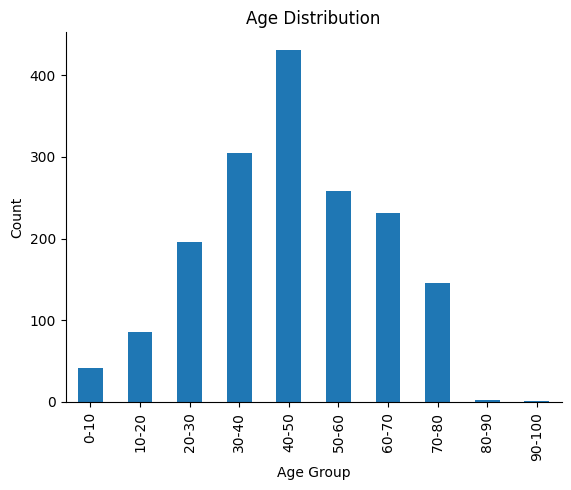

In [ ]:
from matplotlib import pyplot as plt
df['age_group'] = pd.cut(df['age'], bins=[0, 10, 20, 30, 40, 50, 60, 70, 80, 90, 100],
                       labels=['0-10', '10-20', '20-30', '30-40', '40-50', '50-60', '60-70', '70-80', '80-90', '90-100'])

df['age_group'] = pd.Categorical(df['age_group'], categories=['0-10', '10-20', '20-30', '30-40', '40-50', '50-60', '60-70', '70-80', '80-90', '90-100'], ordered=True)

df['age_group'].value_counts().sort_index().plot(kind='bar', title='age')
plt.gca().spines[['top', 'right',]].set_visible(False)
plt.xlabel('Age Group')
plt.ylabel('Count')
plt.title('Age Distribution')
df.drop('age_group', axis=1, inplace=True)

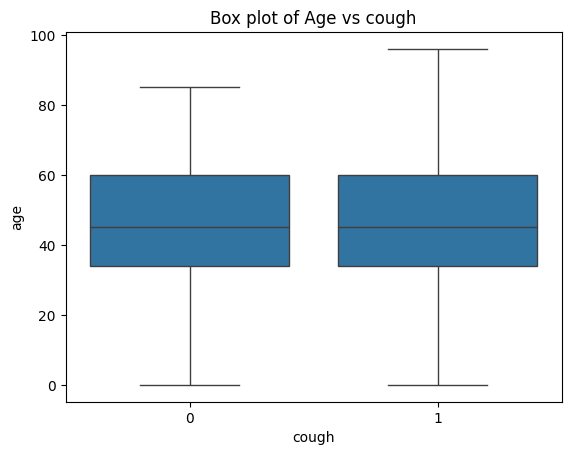

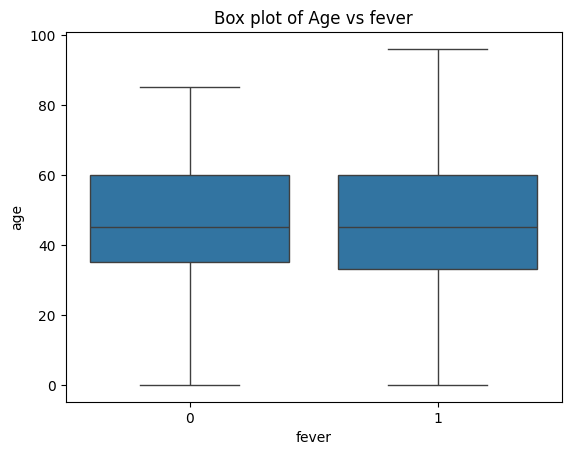

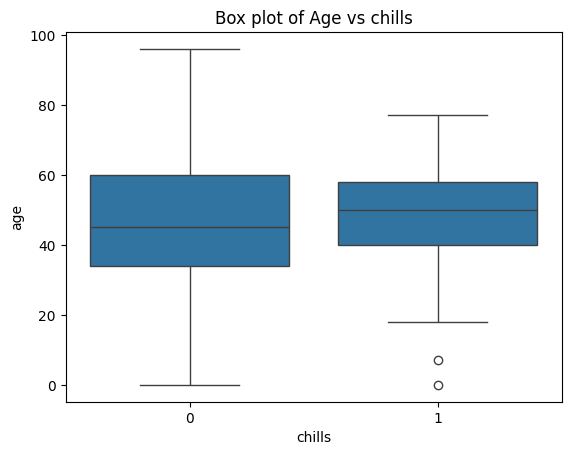

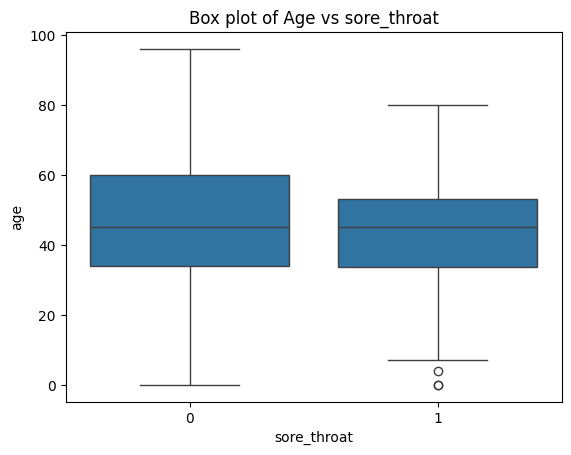

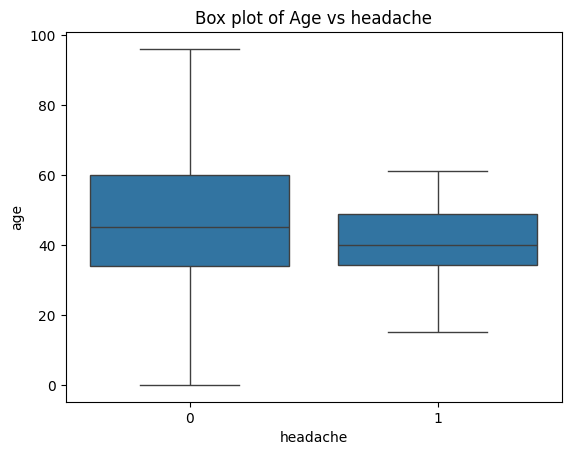

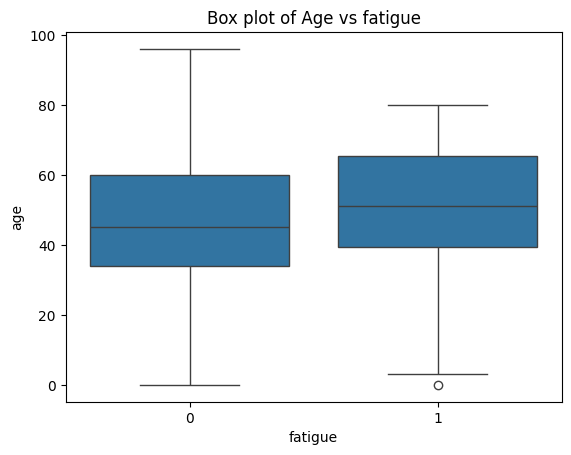

In [ ]:
import seaborn as sns
symptoms = ['cough', 'fever', 'chills', 'sore_throat', 'headache', 'fatigue']

for symptom in symptoms:
  sns.boxplot(x=df[symptom], y=df['age'])
  plt.title(f'Box plot of Age vs {symptom}')
  plt.show()

In [ ]:
print(df.columns)
df = df.drop('ID', axis=1)
df = df.drop('date_confirmation',axis =1)
df = df.drop('date_onset_symptoms',axis =1)

Index(['ID', 'age', 'sex', 'cough', 'fever', 'chills', 'sore_throat',
       'headache', 'fatigue', 'urgency_of_admission', 'date_onset_symptoms',
       'date_confirmation', 'date_difference_in_days'],
      dtype='object')


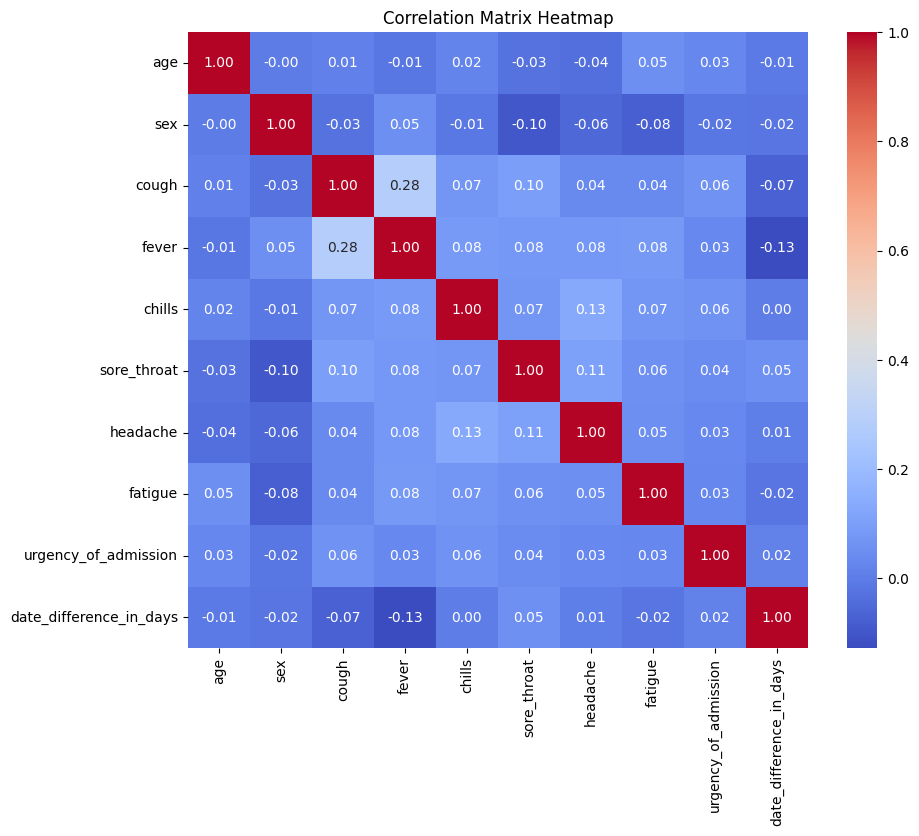

In [ ]:
# Calculate the correlation matrix
correlation_matrix = df.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix Heatmap')
plt.show()

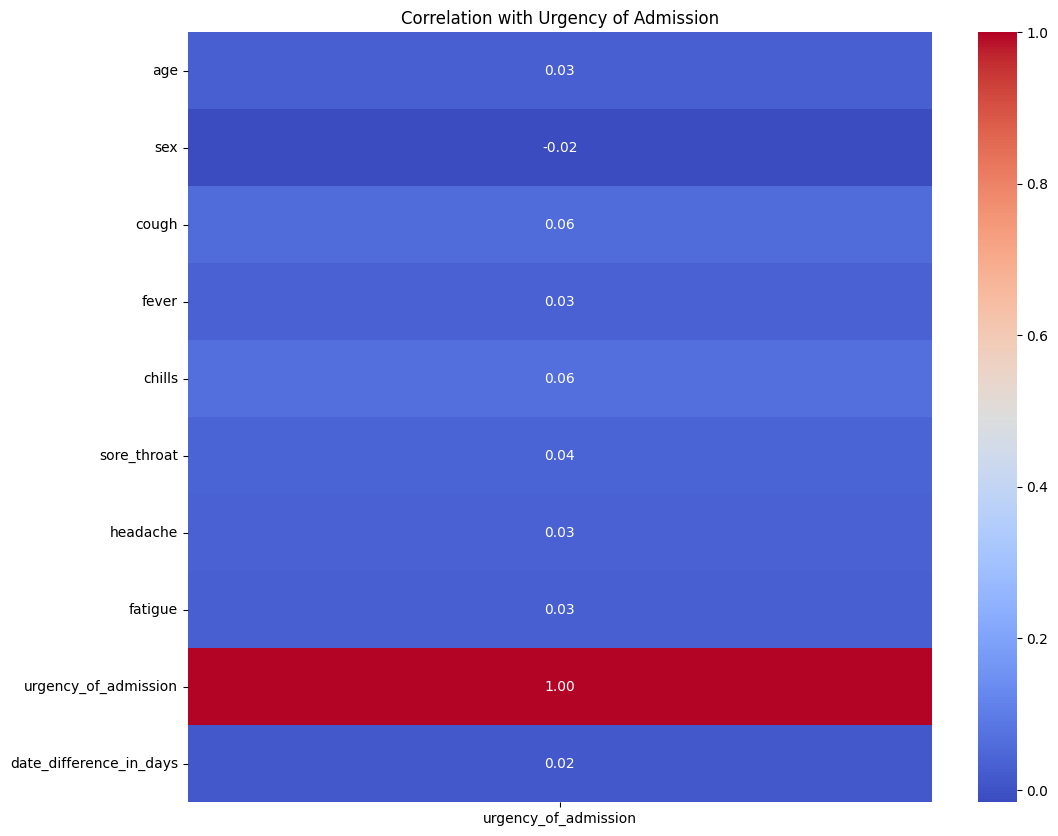

In [ ]:
#Correlation wrt target column
correlation_matrix = df.corr()
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix[['urgency_of_admission']], annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation with Urgency of Admission')
plt.show()

In [ ]:
#Applying Logistic Regression Model
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV

X = df.drop('urgency_of_admission', axis=1)
y = df['urgency_of_admission']

for col in X.columns:
    if X[col].dtype == 'datetime64[ns]':
        X[col] = pd.to_numeric(X[col])

scaler = StandardScaler()
X = scaler.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = LogisticRegression(max_iter=500)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)


Accuracy: 0.782608695652174


In [ ]:
param_grid = {
    'C': [0.01, 0.1, 1, 10, 100],  # Regularization strength
    'penalty': ['l1', 'l2'],        # Regularization type
    'solver': ['liblinear'],        # Solver for small datasets
}

In [ ]:
model = LogisticRegression()

In [ ]:
grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=5, scoring='accuracy')

# Fit the model on the training data
grid_search.fit(X_train, y_train)

# Best parameters found by GridSearchCV
print("Best Hyperparameters:", grid_search.best_params_)

Best Hyperparameters: {'C': 0.01, 'penalty': 'l1', 'solver': 'liblinear'}


In [ ]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
# Get the best model from GridSearchCV
best_model = grid_search.best_estimator_

# Make predictions on the test set
y_pred = best_model.predict(X_test)

# Evaluate the model
print("Accuracy on test data:", accuracy_score(y_test, y_pred))
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

Accuracy on test data: 0.782608695652174

Classification Report:
              precision    recall  f1-score   support

           0       0.00      0.00      0.00        75
           1       0.78      1.00      0.88       270

    accuracy                           0.78       345
   macro avg       0.39      0.50      0.44       345
weighted avg       0.61      0.78      0.69       345



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [ ]:
y_pred_proba = model.predict_proba(X_test)[:,1]

print("Confidence Scores:")
for i in range(len(y_pred)):
  print(f"Prediction: {y_pred[i]}, Confidence: {y_pred_proba[i]:.2f}")

Confidence Scores:
Prediction: 1, Confidence: 0.74
Prediction: 1, Confidence: 0.77
Prediction: 1, Confidence: 0.77
Prediction: 1, Confidence: 0.78
Prediction: 1, Confidence: 0.74
Prediction: 1, Confidence: 0.77
Prediction: 1, Confidence: 0.81
Prediction: 1, Confidence: 0.74
Prediction: 1, Confidence: 0.74
Prediction: 1, Confidence: 0.86
Prediction: 1, Confidence: 0.82
Prediction: 1, Confidence: 0.78
Prediction: 1, Confidence: 0.78
Prediction: 1, Confidence: 0.79
Prediction: 1, Confidence: 0.76
Prediction: 1, Confidence: 0.85
Prediction: 1, Confidence: 0.77
Prediction: 1, Confidence: 0.79
Prediction: 1, Confidence: 0.84
Prediction: 1, Confidence: 0.78
Prediction: 1, Confidence: 0.78
Prediction: 1, Confidence: 0.86
Prediction: 1, Confidence: 0.78
Prediction: 1, Confidence: 0.82
Prediction: 1, Confidence: 0.76
Prediction: 1, Confidence: 0.77
Prediction: 1, Confidence: 0.82
Prediction: 1, Confidence: 0.95
Prediction: 1, Confidence: 0.78
Prediction: 1, Confidence: 0.81
Prediction: 1, Confid

In [ ]:
from sklearn.metrics import precision_score, recall_score, f1_score

precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')

print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)

Precision: 0.612476370510397
Recall: 0.782608695652174
F1 Score: 0.6871686108165429


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [ ]:
#Applying Random Forest Model
from sklearn.ensemble import RandomForestClassifier

X = df.drop('urgency_of_admission', axis=1)
y = df['urgency_of_admission']

for col in X.columns:
  if X[col].dtype == 'datetime64[ns]':
    X[col] = pd.to_numeric(X[col])


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)


model = RandomForestClassifier(n_estimators=185, random_state=42)
model.fit(X_train, y_train)


y_pred = model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.7768014059753954


In [ ]:
#Applying feature importance in Random Forest

rf = RandomForestClassifier()
rf.fit(X_train, y_train)

feature_importances = rf.feature_importances_

importance_df = pd.DataFrame({
    'Feature': X_train.columns,
    'Importance': feature_importances
}).sort_values(by='Importance', ascending=False)

print(importance_df)


                   Feature  Importance
8  date_difference_in_days    0.439810
0                      age    0.419843
1                      sex    0.037375
3                    fever    0.033444
2                    cough    0.027943
7                  fatigue    0.013955
5              sore_throat    0.012910
4                   chills    0.007586
6                 headache    0.007133


In [ ]:

precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')

print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)

Precision: 0.7239811782493178
Recall: 0.7768014059753954
F1 Score: 0.7409401636824938


In [ ]:
y_pred_proba = model.predict_proba(X_test)

print("Confidence Scores:")
for i in range(len(y_pred)):
  print(f"Prediction: {y_pred[i]}, Confidence: {max(y_pred_proba[i]):.2f}")

Confidence Scores:
Prediction: 1, Confidence: 0.64
Prediction: 0, Confidence: 0.58
Prediction: 1, Confidence: 0.90
Prediction: 1, Confidence: 0.94
Prediction: 1, Confidence: 0.78
Prediction: 1, Confidence: 0.93
Prediction: 0, Confidence: 0.61
Prediction: 1, Confidence: 0.70
Prediction: 1, Confidence: 0.98
Prediction: 1, Confidence: 0.86
Prediction: 1, Confidence: 0.78
Prediction: 1, Confidence: 0.99
Prediction: 1, Confidence: 0.97
Prediction: 1, Confidence: 0.99
Prediction: 1, Confidence: 0.83
Prediction: 1, Confidence: 0.85
Prediction: 1, Confidence: 0.78
Prediction: 1, Confidence: 0.99
Prediction: 1, Confidence: 0.91
Prediction: 1, Confidence: 0.76
Prediction: 1, Confidence: 0.83
Prediction: 1, Confidence: 0.99
Prediction: 1, Confidence: 0.67
Prediction: 1, Confidence: 0.70
Prediction: 1, Confidence: 0.83
Prediction: 1, Confidence: 0.93
Prediction: 1, Confidence: 0.75
Prediction: 1, Confidence: 0.89
Prediction: 1, Confidence: 0.78
Prediction: 1, Confidence: 0.57
Prediction: 1, Confid

In [ ]:
#Applying KNN Model
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split



X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.38, random_state=42)

for col in X.columns:
  if X[col].dtype == 'datetime64[ns]':
    X[col] = pd.to_numeric(X[col])

knn_model = KNeighborsClassifier(n_neighbors=25)
knn_model.fit(X_train, y_train)


y_pred = knn_model.predict(X_test)


accuracy = accuracy_score(y_test, y_pred)
print("KNN Accuracy:", accuracy)


KNN Accuracy: 0.8091603053435115


In [ ]:
#Finding feature importance in KNN model
from sklearn.inspection import permutation_importance

perm_importance = permutation_importance(knn_model, X_test, y_test)
feature_importances = perm_importance.importances_mean

for i, importance in enumerate(feature_importances):
    print(f"Feature {X_train.columns[i]}: {importance}")


Feature age: 0.002137404580152702
Feature sex: 0.002137404580152702
Feature cough: 0.0
Feature fever: 0.003053435114503844
Feature chills: 0.0
Feature sore_throat: 0.0
Feature headache: 0.0
Feature fatigue: 0.0
Feature date_difference_in_days: 0.0012213740458015376


In [ ]:
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')

print("KNN Precision:", precision)
print("KNN Recall:", recall)
print("KNN F1 Score:", f1)

KNN Precision: 0.7509264346585928
KNN Recall: 0.8091603053435115
KNN F1 Score: 0.7266668905647827


In [ ]:

y_pred_proba = knn_model.predict_proba(X_test)

print("KNN Confidence Scores:")
for i in range(len(y_pred)):
  print(f"Prediction: {y_pred[i]}, Confidence: {max(y_pred_proba[i]):.2f}")

KNN Confidence Scores:
Prediction: 1, Confidence: 0.72
Prediction: 1, Confidence: 0.72
Prediction: 1, Confidence: 0.80
Prediction: 1, Confidence: 0.92
Prediction: 1, Confidence: 0.80
Prediction: 1, Confidence: 0.84
Prediction: 1, Confidence: 0.52
Prediction: 1, Confidence: 0.80
Prediction: 1, Confidence: 0.96
Prediction: 1, Confidence: 0.92
Prediction: 1, Confidence: 1.00
Prediction: 1, Confidence: 0.76
Prediction: 1, Confidence: 0.96
Prediction: 1, Confidence: 0.88
Prediction: 1, Confidence: 0.64
Prediction: 1, Confidence: 0.92
Prediction: 1, Confidence: 0.72
Prediction: 1, Confidence: 0.92
Prediction: 1, Confidence: 0.92
Prediction: 1, Confidence: 0.88
Prediction: 1, Confidence: 0.68
Prediction: 1, Confidence: 0.76
Prediction: 1, Confidence: 0.88
Prediction: 1, Confidence: 0.76
Prediction: 1, Confidence: 0.96
Prediction: 1, Confidence: 0.68
Prediction: 1, Confidence: 0.92
Prediction: 1, Confidence: 0.92
Prediction: 1, Confidence: 0.64
Prediction: 1, Confidence: 0.84
Prediction: 1, Co